In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
df = pd.read_csv('creditcard.csv')

## EDA

In [5]:
# Glimspe the dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Describe the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Check the distribution of the target variable
print("Percentage Non Fraud in Transactions: {:.2f}%".format((df['Class'].value_counts()[0] / len(df)) * 100))
print("Percentage Fraud in Transactions: {:.2f}%".format((df['Class'].value_counts()[1] / len(df)) * 100))

Percentage Non Fraud in Transactions: 99.83%
Percentage Fraud in Transactions: 0.17%


Text(0.5, 0, 'Class')

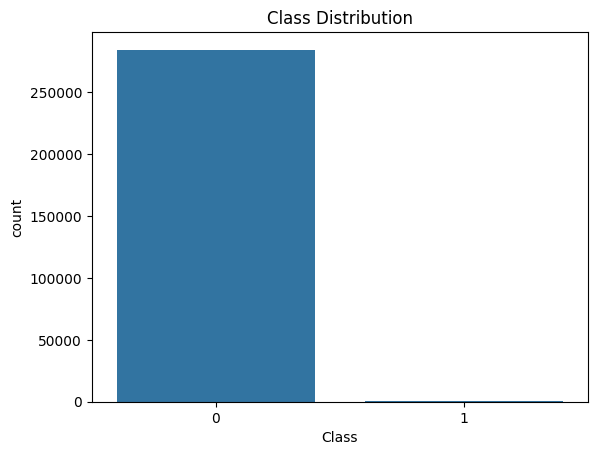

In [9]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')

Text(0.5, 0, 'Class')

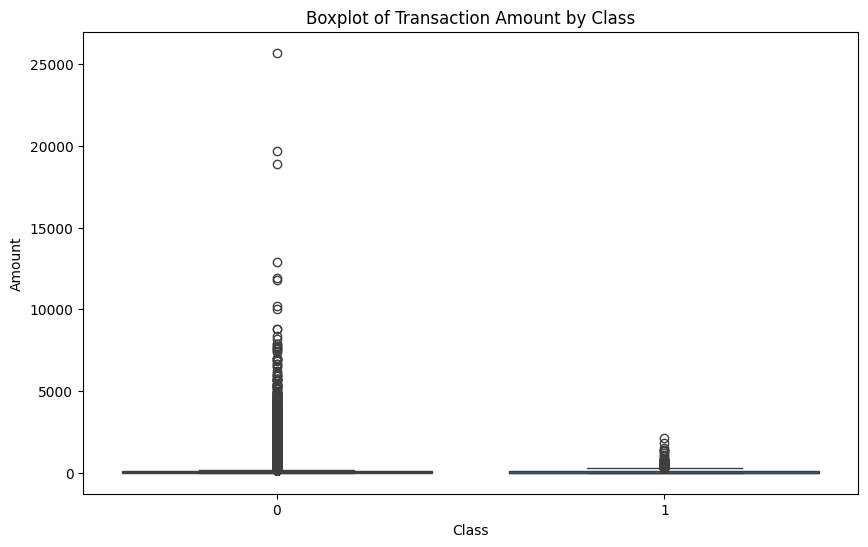

In [10]:
# Visualize the transaction amount distribution by Class
fig , ax = plt.subplots(figsize=(10, 6))
boxplot = sns.boxplot(x='Class', y='Amount', data=df, ax=ax)
boxplot.set_title('Boxplot of Transaction Amount by Class')
boxplot.set_xlabel('Class')

Text(0.5, 0, 'Class')

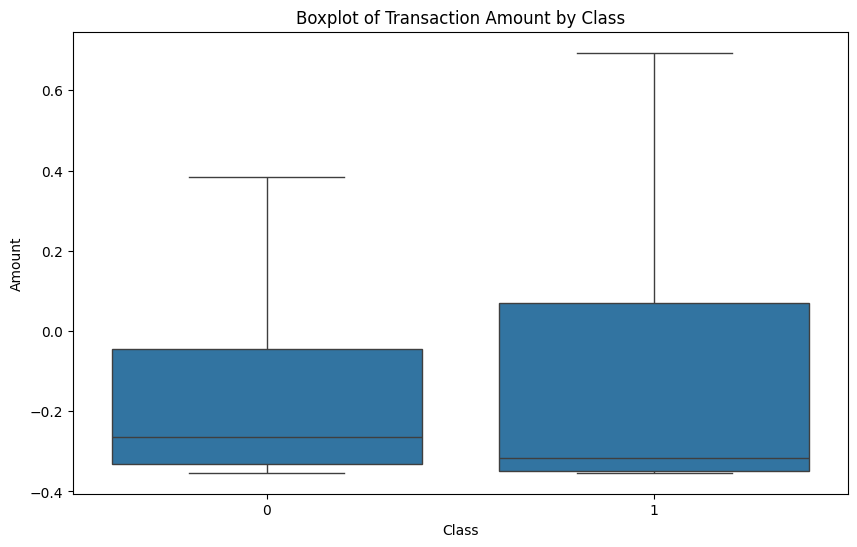

In [20]:
# Visualize the transaction amount distribution by Class
fig , ax = plt.subplots(figsize=(10, 6))
boxplot = sns.boxplot(x='Class', y='Amount', data=df, ax=ax, showfliers=False)
boxplot.set_title('Boxplot of Transaction Amount by Class')
boxplot.set_xlabel('Class')

Text(0, 0.5, 'Frequency')

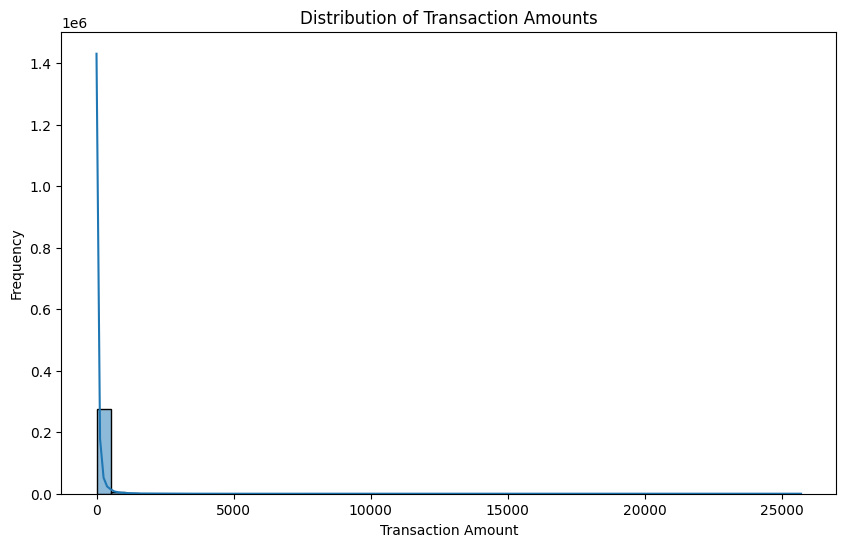

In [11]:
# Visualize the distribution of transaction amounts
fig, ax = plt.subplots(figsize=(10, 6))

ammount_transaction = df['Amount'].values

sns.histplot(ammount_transaction, bins=50, kde=True, ax=ax)
ax.set_title('Distribution of Transaction Amounts')
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Frequency')

C:\Users\NxD08\AppData\Local\Temp\ipykernel_13444\699949499.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Density')

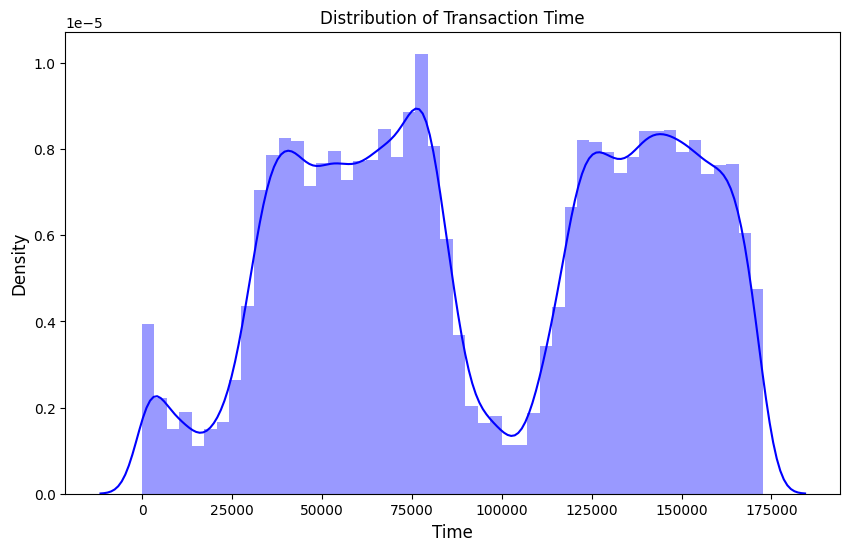

In [12]:
# Visualize the distribution of transaction times
fig, ax = plt.subplots(figsize=(10, 6))

time_transaction = df['Time'].values

sns.distplot(time_transaction, color='b')
ax.set_title('Distribution of Transaction Time')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

In [13]:
# Visualize the distribution of transaction times by Class
Non_fraud = df.loc[df['Class'] == 0]["Time"]
Fraud = df.loc[df['Class'] == 1]["Time"]

hist_data = [Non_fraud, Fraud]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions by Time', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

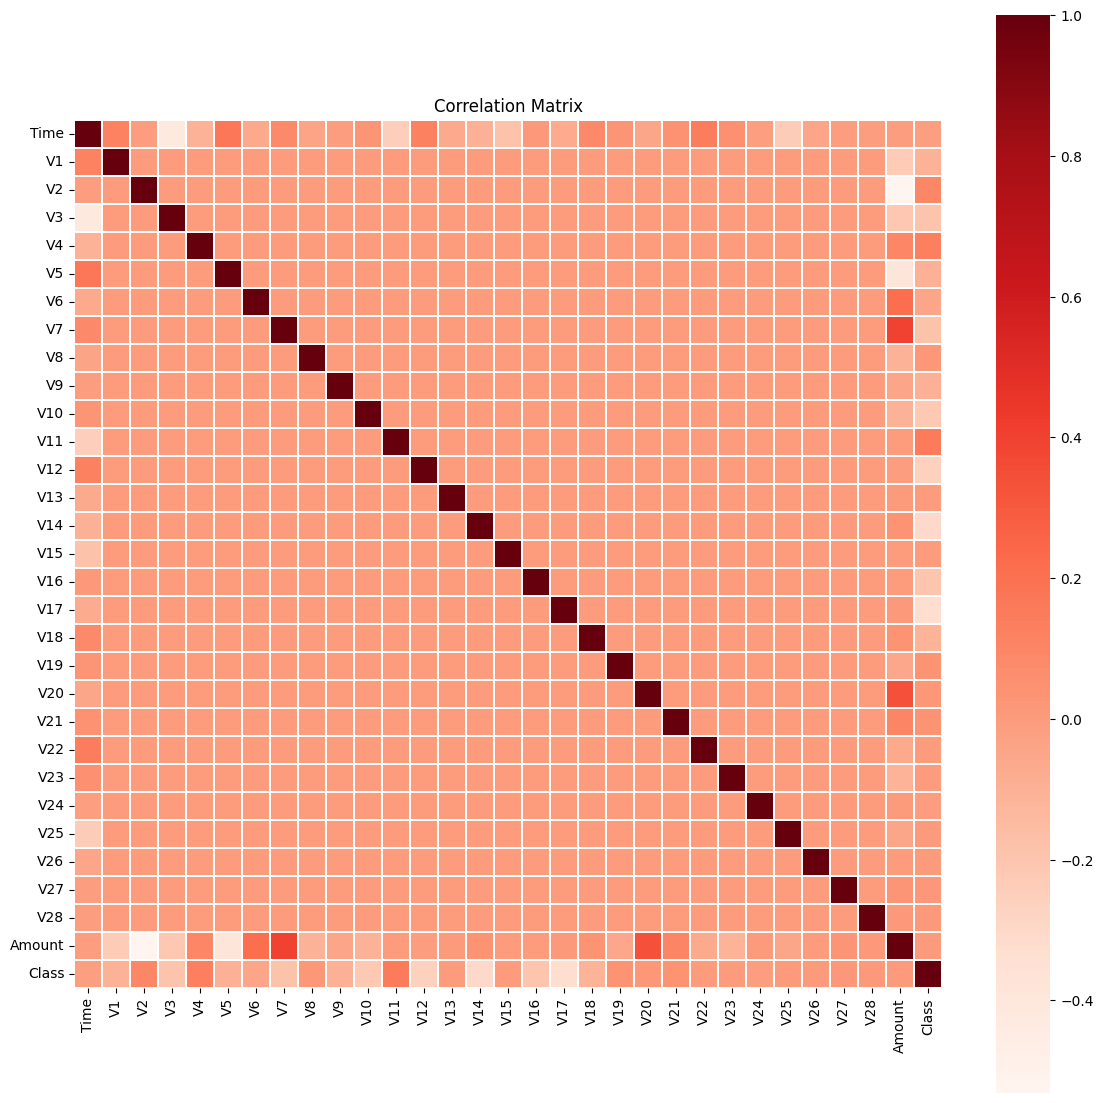

In [ ]:
# Correlation Matrix
plt.figure(figsize = (14,14))
plt.title('Correlation Matrix')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds", square=True)
plt.show()

### Scaling Data

In [15]:
# Scaling Data use StandardScaler
SS = StandardScaler()
df['Amount'] = SS.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = SS.fit_transform(df['Time'].values.reshape(-1, 1))

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


### Split Data

In [16]:
# Split the dataset into features and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [17]:
# Under Sampling
rus = RandomUnderSampler(random_state=42)
train_X_us, train_y_us = rus.fit_resample(train_X, train_y)

## KNN

In [39]:
KNN = KNeighborsClassifier()

KNN.fit(train_X_us, train_y_us)
y_pred_KNN = KNN.predict(test_X)
print("KNN Model Performance on Test Set:")
print("Accuracy:", accuracy_score(test_y, y_pred_KNN))
print("Precision:", precision_score(test_y, y_pred_KNN))
print("Recall:", recall_score(test_y, y_pred_KNN))
print("F1 Score:", f1_score(test_y, y_pred_KNN))
print("ROC AUC Score:", roc_auc_score(test_y, y_pred_KNN))
print(classification_report(test_y, y_pred_KNN))

KNN Model Performance on Test Set:
Accuracy: 0.9719988764439451
Precision: 0.05313432835820896
Recall: 0.9081632653061225
F1 Score: 0.10039481105470953
ROC AUC Score: 0.9401360783480528
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



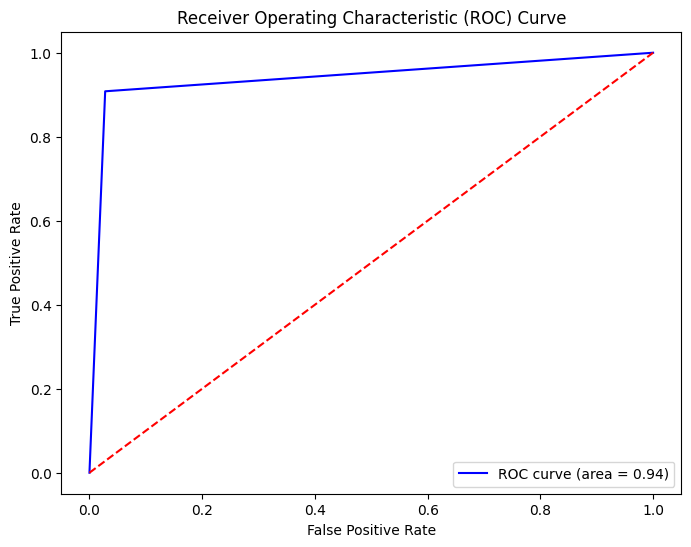

In [40]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_y, KNN.predict(test_X))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classification

In [ ]:
## Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_X_us, train_y_us)
y_pred_rf = rf.predict(test_X)
print("Random Forest Model Performance on Test Set:")
print("Accuracy:", accuracy_score(test_y, y_pred_rf))
print("Precision:", precision_score(test_y, y_pred_rf))
print("Recall:", recall_score(test_y, y_pred_rf))
print("F1 Score:", f1_score(test_y, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(test_y, y_pred_rf))
print(classification_report(test_y, y_pred_rf))

Random Forest Model Performance on Test Set:
Accuracy: 0.9640988729328324
Precision: 0.04231311706629055
Recall: 0.9183673469387755
F1 Score: 0.08089887640449438
ROC AUC Score: 0.9412725170259437
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



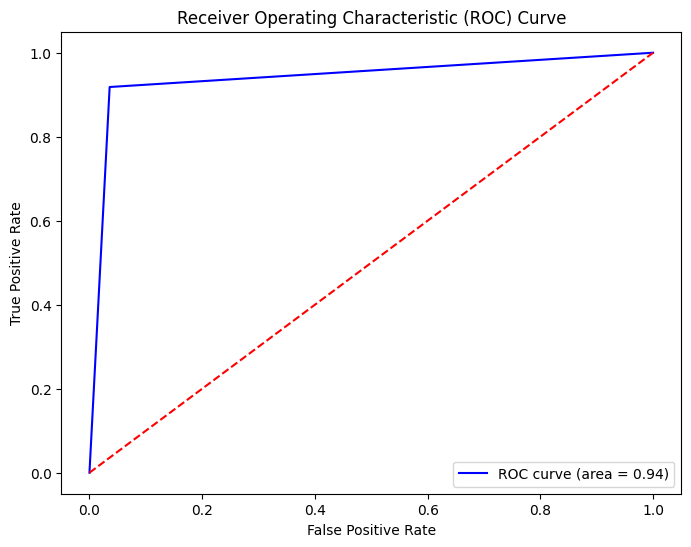

In [36]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(test_y, rf.predict(test_X))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()